In [33]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# the goal of data structure `DiscreteVariable`

Map a finite domaine $(0...domainSize-1)$ on a list of labels.

For a variable $X$ that can take the values $a,e,i,o,u,y$ , $X$ is represented by an array

| index | 0| 1 | 2 | 3 | 4 | 5 |
|-|-|-|-|-|-|-|
| label | a|e|i|o|u|y|

And the domain size of $X$ is $6$.

# 4 different types of discrete random variables


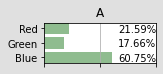
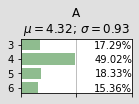
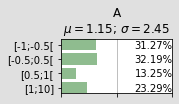
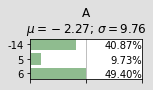

In [61]:
def aff(name,fastStx):
    bn=gum.fastBN(fastStx)
    return (f"<h2>{name}</h2>",
            f"<tt>{fastStx}</tt>",
            gnb.getPotential(bn.cpt(0)),
            gnb.getPosterior(bn,target=0,evs={}))

gnb.sideBySide(*aff("gum.LabelizedVariable","A{Red|Green|Blue}"),
               *aff("gum.RangeVariable","A[3,6]"),
               *aff("gum.DiscretizedVariable","A[-1,-0.5,0.5,1,10]"),
               *aff("gum.IntegerVariable","A{-14|5|6}"),
              ncols=4)


In [36]:
bn=gum.fastBN("A{Red|Green|Blue}->B[3,6]->C[-1,-0.5,0.5,1,10];A->D{-14|5|6}->B")
gnb.sideBySide(bn,gnb.getInference(bn))

# Shared (simple) API for all types

In [64]:
def apiDiscreteVar(variable,value,position):
    print(f"{variable} : {value=}, {position=}")
    print(f" + {variable.domainSize()=}")
    print(f" + {variable[value]=}")
    print(f" + {variable.index(value)=}")
    print(f" + {variable.label(position)=}")
    
apiDiscreteVar(bn.variable("A"),"Green",0)
apiDiscreteVar(bn.variable("B"),"5",0)
apiDiscreteVar(bn.variable("C"),"0.75",0)
apiDiscreteVar(bn.variable("D"),"5",0)

A:Labelized(<Red,Green,Blue>) : value='Green', position=0
 + variable.domainSize()=3
 + variable[value]=1
 + variable.index(value)=1
 + variable.label(position)='Red'
B:Range([3,6]) : value='5', position=0
 + variable.domainSize()=4
 + variable[value]=2
 + variable.index(value)=2
 + variable.label(position)='3'
C:Discretized(<[-1;-0.5[,[-0.5;0.5[,[0.5;1[,[1;10]>) : value='0.75', position=0
 + variable.domainSize()=4
 + variable[value]=2
 + variable.index(value)=2
 + variable.label(position)='[-1;-0.5['
D:Integer(<-14,5,6>) : value='5', position=0
 + variable.domainSize()=3
 + variable[value]=1
 + variable.index(value)=1
 + variable.label(position)='-14'
